##Импорты
Импорт wrapper'ов для `LAPACK`. Пакеты `numpy` и `matplotlib` используются для удобства вывода результатов и `seaborn` для красоты графиков.

In [7]:
from scipy.linalg import lapack
import numpy as np

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

##Параметры сетки

In [8]:
N = 100
x_0 = 0.
x_max = 20.
h = (x_max - x_0)/N

##Потенциал Морзе

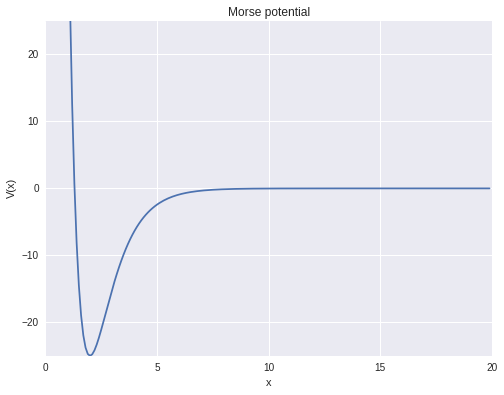

In [9]:
# Morse potential
morse_V = lambda x, kappa, x0: kappa**2*(np.exp(-2*(x-x0)) - 2*np.exp(-(x-x0)))
kappa = 5.
x0 = 2.

# Morse potential plotting
plt.figure(figsize=(8, 6))
x = np.arange(x_0, x_max, 0.1)
y = morse_V(x, kappa, x0)
plt.plot(x, y)
plt.ylim(min(y), -min(y))
plt.xlabel("x")
plt.ylabel("V(x)")
plt.title("Morse potential")
plt.show()

##Заполнение трехдиагональной матрицы A

In [10]:
# Matrix A filling
A = [[0 for j in range(N)] for k in range(N)]
for j in range(N):
    x = x_0 + h*j
    A[j][j] = 2/h**2 + morse_V(x, kappa, x0)
    if j > 0:
        A[j][j-1] = -1/h**2
    if j < N-1:
        A[j][j+1] = -1/h**2
        
print("First 3x3 block of A:\n", np.array(A)[:3,:3])

First 3x3 block of A:
 [[ 1045.50094588   -25.             0.        ]
 [  -25.           662.47348787   -25.        ]
 [    0.           -25.           415.66163371]]


## Вычисление собственных значений и собственных векторов матрицы A
Производится вычисления собственных значений и чисел, сортировка собственных чисел по возрастанию и вывод первых 10

In [12]:
out = lapack.dgeev(A)
eigvalr = sorted(out[0])
for i in range(10):
    print(' Coбственное значение ', i, ' = ', eigvalr[i])

 Coбственное значение  0  =  -20.3051560467
 Coбственное значение  1  =  -12.4347155568
 Coбственное значение  2  =  -6.54085398315
 Coбственное значение  3  =  -2.52795701237
 Coбственное значение  4  =  -0.375965017382
 Coбственное значение  5  =  0.049504533284
 Coбственное значение  6  =  0.196873768424
 Coбственное значение  7  =  0.43360089015
 Coбственное значение  8  =  0.750081495731
 Coбственное значение  9  =  1.13972964289


## Вывод графика с собственными значениями на фоне потенциала Морзе
На графике линиями с текстом отмечены связанные состояния. Свободные состояния указаны прозрачными линиями.

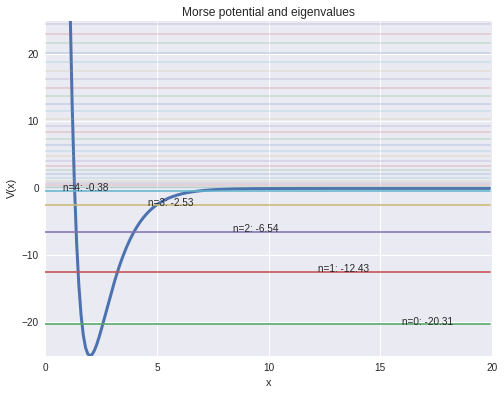

In [13]:
plt.figure(figsize=(8, 6))
x = np.arange(x_0, x_max, 0.1)
y = morse_V(x, kappa, x0)
plt.plot(x, y, lw=3)
plt.ylim(min(y), -min(y))
plt.xlabel("x")
plt.ylabel("V(x)")
plt.title("Morse potential and eigenvalues")
for i in range(N):
    if eigvalr[i]<0:
        plt.plot(x, [eigvalr[i] for j in range(len(x))], alpha = 0.9)
        plt.text(x_max-i*3.8-4, eigvalr[i], "n=%d: %.2f" % (i, eigvalr[i]))
    else:
         plt.plot(x, [eigvalr[i] for j in range(len(x))], alpha = 0.2)   